In [1]:
import os
import numpy as np
import pandas as pd

import pyspark.sql.functions as F
from pyspark.sql import SparkSession, DataFrame


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pyspark.sql.functions as F
import regex as re
import seaborn as sns
from IPython.display import display


PATH_MAIN = '/project/ds5559/group2nba'
PATH_STACKED = f'{PATH_MAIN}/stacked_data/'
RESULTS_FILE = f'{PATH_MAIN}/results_expanded_bonus.csv'
TARGET = 'Won'
FEATURES = 'features'

CORES = 1

spark = SparkSession \
    .builder \
    .appName('group2nba') \
    .master(f'local[{CORES}]') \
    .getOrCreate()



In [2]:
from pyspark.sql.types import *
from typing import *
import pyspark.sql.functions as F

T = TypeVar('T')

FIELDS: Dict[str, T] = {
      'Date': StringType
    , 'HomeTeam': StringType
    , 'AwayTeam': StringType
    , 'Team': StringType
    , 'Year': IntegerType
    , 'Won': IntegerType
    
    , 'ScoreDiff': IntegerType
    , 'Quarter': IntegerType
    , 'SecLeftTotal': IntegerType
    , 'LogSecLeftTotal': DoubleType
    , 'SecLeftTotalInverse': DoubleType
    
    , 'HasPossession': IntegerType
    , 'assist_team_cnt': LongType
    , 'assist_opponent_cnt': LongType
    , 'turnover_team_cnt': LongType
    , 'turnover_opponent_cnt': LongType
    , 'block_team_cnt': LongType
    , 'block_opponent_cnt': LongType
    
    , 'foul_team_cnt': LongType
    , 'foul_opponent_cnt': LongType
    , 'rebound_team_cnt': LongType
    , 'rebound_opponent_cnt': LongType
    , 'shotOnGoal_team_cnt': LongType
    , 'shotOnGoal_opponent_cnt': LongType
    , 'freeThrow_team_cnt': LongType
    , 'freeThrow_opponent_cnt': LongType
    
    , 'SecLeftTotalInverseTimesScoreDiff': DoubleType
    , 'assist_diff': IntegerType
    , 'turnover_diff': IntegerType
    , 'block_diff': IntegerType
    , 'foul_diff': IntegerType
    , 'rebound_diff': IntegerType
    , 'shotOnGoal_diff': IntegerType
    , 'freeThrow_diff': IntegerType
}
    
schema = StructType([StructField(k, v()) for k, v in FIELDS.items()])
print(schema)

StructType(List(StructField(Date,StringType,true),StructField(HomeTeam,StringType,true),StructField(AwayTeam,StringType,true),StructField(Team,StringType,true),StructField(Year,IntegerType,true),StructField(Won,IntegerType,true),StructField(ScoreDiff,IntegerType,true),StructField(Quarter,IntegerType,true),StructField(SecLeftTotal,IntegerType,true),StructField(LogSecLeftTotal,DoubleType,true),StructField(SecLeftTotalInverse,DoubleType,true),StructField(HasPossession,IntegerType,true),StructField(assist_team_cnt,LongType,true),StructField(assist_opponent_cnt,LongType,true),StructField(turnover_team_cnt,LongType,true),StructField(turnover_opponent_cnt,LongType,true),StructField(block_team_cnt,LongType,true),StructField(block_opponent_cnt,LongType,true),StructField(foul_team_cnt,LongType,true),StructField(foul_opponent_cnt,LongType,true),StructField(rebound_team_cnt,LongType,true),StructField(rebound_opponent_cnt,LongType,true),StructField(shotOnGoal_team_cnt,LongType,true),StructField(sho

In [3]:
list_files = [
#     'NBA_PBP_2015-16.csv',
#     'NBA_PBP_2016-17.csv',
#     'NBA_PBP_2017-18.csv',
    'NBA_PBP_2018-19.csv',
#     'NBA_PBP_2019-20.csv'
]

# Read in all Train_Files

file_list = []
for item in list_files:
    file_list.append(PATH_STACKED + item)
    
print(file_list)

def read_in_file(full_file_name):

    df = spark.read \
        .format('csv') \
        .option('header', True) \
        .schema(schema) \
        .load(full_file_name)
    
    return df

df_eda = read_in_file(file_list)

['/project/ds5559/group2nba/stacked_data/NBA_PBP_2018-19.csv']


In [4]:
display(df_eda.count())
display(df_eda.printSchema())
display(df_eda.head(2))

1228628

root
 |-- Date: string (nullable = true)
 |-- HomeTeam: string (nullable = true)
 |-- AwayTeam: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Won: integer (nullable = true)
 |-- ScoreDiff: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- SecLeftTotal: integer (nullable = true)
 |-- LogSecLeftTotal: double (nullable = true)
 |-- SecLeftTotalInverse: double (nullable = true)
 |-- HasPossession: integer (nullable = true)
 |-- assist_team_cnt: long (nullable = true)
 |-- assist_opponent_cnt: long (nullable = true)
 |-- turnover_team_cnt: long (nullable = true)
 |-- turnover_opponent_cnt: long (nullable = true)
 |-- block_team_cnt: long (nullable = true)
 |-- block_opponent_cnt: long (nullable = true)
 |-- foul_team_cnt: long (nullable = true)
 |-- foul_opponent_cnt: long (nullable = true)
 |-- rebound_team_cnt: long (nullable = true)
 |-- rebound_opponent_cnt: long (nullable = true)
 |-- shotOnGoal_team_cnt: lon

None

[Row(Date='December 22 2018', HomeTeam='WAS', AwayTeam='PHO', Team='PHO', Year=2018, Won=0, ScoreDiff=0, Quarter=1, SecLeftTotal=3761, LogSecLeftTotal=8.232706009860976, SecLeftTotalInverse=0.0002658160552897395, HasPossession=1, assist_team_cnt=0, assist_opponent_cnt=0, turnover_team_cnt=0, turnover_opponent_cnt=0, block_team_cnt=0, block_opponent_cnt=0, foul_team_cnt=0, foul_opponent_cnt=0, rebound_team_cnt=0, rebound_opponent_cnt=0, shotOnGoal_team_cnt=1, shotOnGoal_opponent_cnt=0, freeThrow_team_cnt=0, freeThrow_opponent_cnt=0, SecLeftTotalInverseTimesScoreDiff=0.0, assist_diff=0, turnover_diff=0, block_diff=0, foul_diff=0, rebound_diff=0, shotOnGoal_diff=1, freeThrow_diff=0),
 Row(Date='December 22 2018', HomeTeam='WAS', AwayTeam='PHO', Team='PHO', Year=2018, Won=0, ScoreDiff=0, Quarter=1, SecLeftTotal=3760, LogSecLeftTotal=8.232440158470336, SecLeftTotalInverse=0.00026588673225206064, HasPossession=0, assist_team_cnt=0, assist_opponent_cnt=0, turnover_team_cnt=0, turnover_opponen

In [5]:
def get_cols(df: DataFrame, columns: List[str]) -> DataFrame:
    '''Selects the specified subset of the specified DataFrame'''
    return df.select(columns).dropna()

In [50]:
# Games Won by Team
df_won = get_cols(df_eda, ['Won', 'Team', 'Date'])

_winners = df_won \
    .where((F.col('Won') == 1)) \
    .groupBy(['Won', 'Team', 'Date']) \
    .agg(F.countDistinct('*') \
         .alias('Count')) \
    .sort(F.desc('Count')) \
    .toPandas()

# df_won.where((F.col('Won') != 1)).select('Won').take(20)

_winners

Won Team              Date  Count
0       1  POR     March 23 2019      1
1       1  SAS   January 27 2019      1
2       1  MIL     March 15 2019      1
3       1  HOU   October 20 2018      1
4       1  MIN  November 26 2018      1
...   ...  ...               ...    ...
1306    1  LAC     April 24 2019      1
1307    1  PHI    January 8 2019      1
1308    1  DET   January 12 2019      1
1309    1  MIL   February 8 2019      1
1310    1  MIA     March 28 2019      1

[1311 rows x 4 columns]

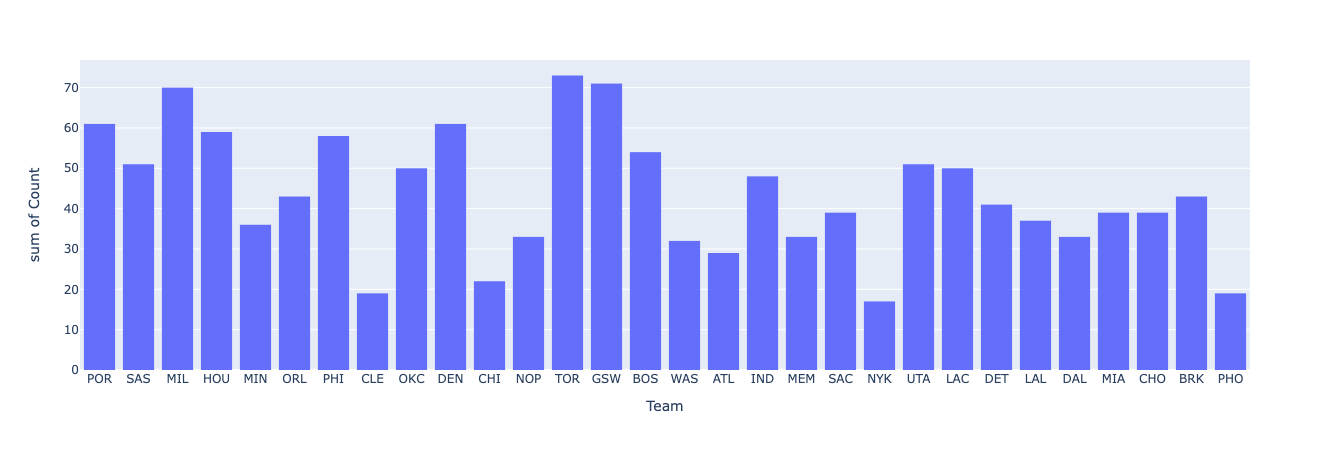

In [53]:
fig = px.histogram(
      _winners
    , x = 'Team'
    , y = 'Count'
    # , color = 'ShotType'
    # , barmode = 'group'
)
fig.show()

In [48]:
list_cols = ['Won', 'ScoreDiff', 'assist_diff', 'turnover_diff', 'block_diff', 'foul_diff', 'rebound_diff', 'shotOnGoal_diff', 'freeThrow_diff']
df_corr = get_cols(df_eda, list_cols)

In [49]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df_corr.columns, outputCol=vector_col)
df_vector = assembler.transform(df_corr).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

In [50]:
rows = matrix.collect()[0]["pearson({})".format(vector_col)].toArray()

df = pd.DataFrame(rows, [list_cols])
df.columns = [list_cols]
df.head(10)

Won ScoreDiff assist_diff turnover_diff block_diff  \
Won              1.000000  0.535436    0.352840     -0.145752  -0.147174   
ScoreDiff        0.535436  1.000000    0.637716     -0.259701  -0.193483   
assist_diff      0.352840  0.637716    1.000000     -0.132623  -0.193631   
turnover_diff   -0.145752 -0.259701   -0.132623      1.000000  -0.031837   
block_diff      -0.147174 -0.193483   -0.193631     -0.031837   1.000000   
foul_diff        0.037553  0.029328   -0.148060      0.094587   0.021509   
rebound_diff     0.261405  0.456339    0.233883      0.321962   0.029724   
shotOnGoal_diff  0.069552  0.141694    0.143748     -0.547841   0.228097   
freeThrow_diff   0.080617  0.093885   -0.212119     -0.050011   0.016964   

                foul_diff rebound_diff shotOnGoal_diff freeThrow_diff  
Won              0.037553     0.261405        0.069552       0.080617  
ScoreDiff        0.029328     0.456339        0.141694       0.093885  
assist_diff     -0.148060     0.233883        0.143748      -0.212119  
turnover_diff    0.094587     0.321962       -0.547841      -0.050011  
block_diff       0.021509     0.029724        0.228097       0.016964  
foul_diff        1.000000     0.147890       -0.328556       0.631671  
rebound_diff     0.147890     1.000000        0.154414       0.202911  
shotOnGoal_diff -0.328556     0.154414        1.000000      -0.391158  
freeThrow_diff   0.631671     0.202911       -0.391158       1.000000

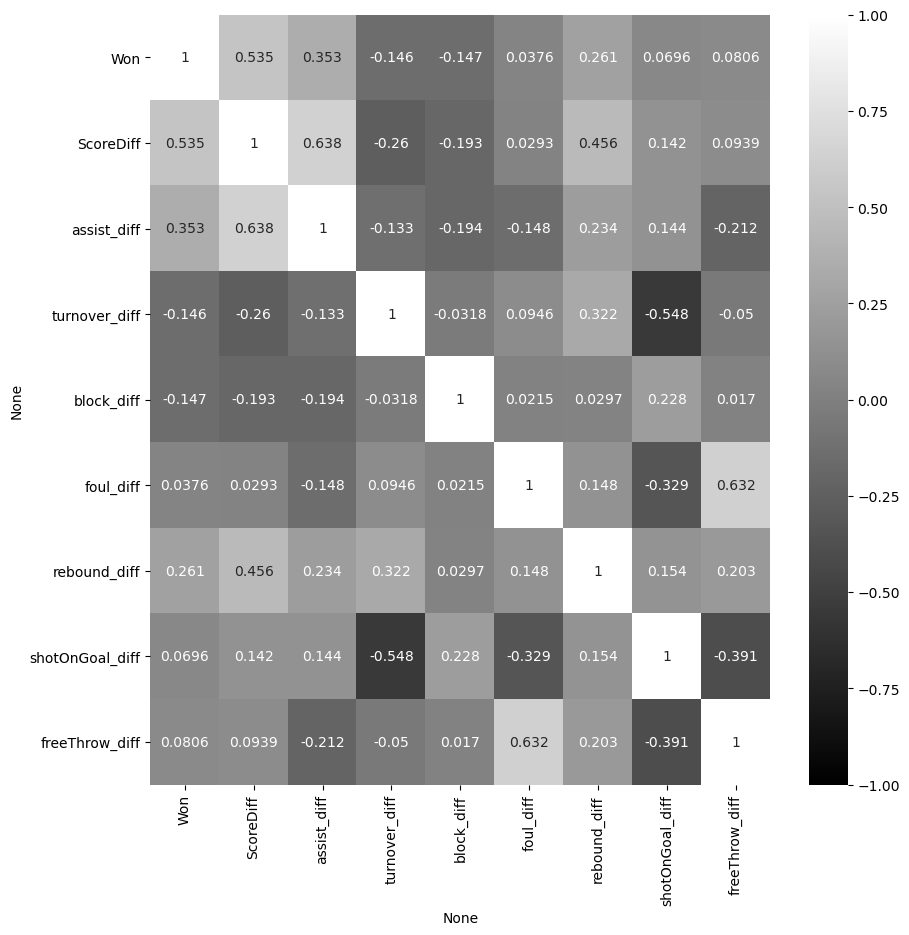

In [51]:
plt.figure(figsize = (10, 10))
sns.heatmap(
      data = df
    , annot = df
    , cmap = 'gray'
    , fmt = '.3g'
    , vmin = -1
    , vmax = 1
)

plt.show()

None
['col', 'col', 'col', 'col', 'col', 'Won', 'SecLeftTotalInverseTimesScoreDiff', 'assist_diff', 'turnover_diff', 'block_diff', 'foul_diff', 'rebound_diff', 'shotOnGoal_diff', 'freeThrow_diff']
